In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "Life-Expectancy-Data-Updated.csv"  # Replace with the actual file path

life_expectancy_df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "lashagoch/life-expectancy-who-updated",
    file_path,
    pandas_kwargs={'encoding': 'ISO-8859-1'}  # Or use 'latin1' if needed
)

C:\Users\krist\AppData\Local\Temp\ipykernel_31348\2468902236.py:6: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  life_expectancy_df = kagglehub.load_dataset(


## Introduction
### The Data
This is WHO data on a variety of health metrics, demographic data, and country information for the years 2000-2015 for 193 countries worldwide. The primary 'dependent variable' is the life expectancy of each country for each year; every other column should contribute to that value in some way, and thereby be useful in predicting life expectancy. The columns of data fall broadly into the following categories:

#### Health data:
+ Adult Mortality- Probability of dying age 15-60, per 1000 people
+ Infant deaths- Deaths under 2-years per 1000
+ Alcohol- Per capita (age 15+) consumption in liters
+ Hepatitus B- HepB immunization coverage among 1-year-olds
+ Measles- Reported cases per 1000
+ BMI- Average body mass index for population
+ Under-5 deaths- Deaths of those younger than 5, per 1000
+ Polio- Immunization coverage for Polio for 1-year-olds
+ Diptheria- Immunization coverage for Dipheria for 1-year-olds
+ Incident HIV- Deaths from HIV/AIDS 15-49 years, per 1000
+ Thinness 10-19 years- Proportion of thinness in children age 10-19 (BMI 2+ standard deviations from the mean)
+ Thinness 5-9 years- Proportion of thinness in children age 5-9 (BMI 2+ standard deviations from the mean)
#### Financial data:
+ Percentage expenditure- Percentage of GDP spent on healthcare
+ Total expenditure- Percentage of total government spending on healthcare
+ Income composition (ICR)- Human Development Index in terms of income composition of resources. Measures the diversity of a country's capital-generating industries.
+ GDP per capita- Gross domestic product divided by population
#### Country information:
+ Status developed- Developed status (1 = True, 0 = False)
+ Status developing- Developing status (1 = True, 0 = False)
+ Schooling- Average years of formal school attended, age 25
+ Population- Country population in millions
+ Country- Country name
+ Year- Year the data is from
+ Region- Geographic location in the world

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Feature Engineering

In [3]:
life_expectancy_df['Population_category'] = life_expectancy_df['Population_mln'].apply(
    lambda x:
        'High' if x > 120.0
        else 'Medium' if x > 50.0
        else 'Low'
)

In [4]:
life_expectancy_df['Schooling_category'] = life_expectancy_df['Schooling'].apply(
    lambda x:
        'High Education' if x > 7.0
        else 'Medium Education' if x > 4.0
        else 'Low Education'
)

In [5]:
life_expectancy_df['Life_expectancy_category'] = life_expectancy_df['Life_expectancy'].apply(
    lambda x:
        'High Life Expectancy' if x > 75.0
        else 'Medium Life Expectancy' if x > 60.0
        else 'Low Life Expectancy'
)  

Right now we have two separate columns:

+ Economy_status_Developed
+ Economy_status_Developing

Each is a boolean (True/False).

We do not need both. It’s redundant — because if a country is "Developed = True", it must be "Developing = False" and vice versa.

In [6]:
life_expectancy_df['Economy_status_Developed'] = life_expectancy_df['Economy_status_Developed'].astype('bool')
life_expectancy_df['Economy_status_Developing'] = life_expectancy_df['Economy_status_Developing'].astype('bool')

In [7]:
life_expectancy_df['Economy_status'] = life_expectancy_df['Economy_status_Developed'].apply(
    lambda x:
        'Developed' if x 
        else 'Developing'
)

life_expectancy_df.drop(['Economy_status_Developed', 'Economy_status_Developing'], axis=1, inplace=True) # Delete the redundant columns

In [8]:
country_rename_map = {
    'United States': 'USA',
    'United Kingdom': 'UK',
    'United Arab Emirates': 'UAE'
}

life_expectancy_df['Country'] = life_expectancy_df['Country'].replace(country_rename_map)

## EDA - Exploratory Data Analysis

In [9]:
print(f'Rows: {life_expectancy_df.shape[0]}\nColumns: {life_expectancy_df.shape[1]}')
life_expectancy_df.head()

Rows: 2864
Columns: 23


,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Life_expectancy,Population_category,Schooling_category,Life_expectancy_category,Economy_status
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,11006,78.53,4.9,4.8,7.8,76.5,Medium,High Education,High Life Expectancy,Developing
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,25742,46.44,0.6,0.5,9.7,82.8,Low,High Education,High Life Expectancy,Developed
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,1076,1183.21,27.1,28.0,5.0,65.4,High,Medium Education,Medium Life Expectancy,Developing
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,4146,0.75,5.7,5.5,7.9,67.0,Low,High Education,Medium Life Expectancy,Developing
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,33995,7.91,1.2,1.1,12.8,81.7,Low,High Education,High Life Expectancy,Developed


In [10]:
info_df = pd.DataFrame({
    "column_name": life_expectancy_df.columns,
    "non-null_count": life_expectancy_df.notnull().sum(),
    "data_type": life_expectancy_df.dtypes.values
}).reset_index(drop=True)

info_df

,column_name,non-null_count,data_type
0,Country,2864,object
1,Region,2864,object
2,Year,2864,int64
3,Infant_deaths,2864,float64
4,Under_five_deaths,2864,float64
5,Adult_mortality,2864,float64
6,Alcohol_consumption,2864,float64
7,Hepatitis_B,2864,int64
8,Measles,2864,int64
9,BMI,2864,float64


In [11]:
missing_df = pd.DataFrame({
    "column_name": life_expectancy_df.isna().sum().keys(),
    "number_missing_values": life_expectancy_df.isna().sum().values
})

missing_df

,column_name,number_missing_values
0,Country,0
1,Region,0
2,Year,0
3,Infant_deaths,0
4,Under_five_deaths,0
5,Adult_mortality,0
6,Alcohol_consumption,0
7,Hepatitis_B,0
8,Measles,0
9,BMI,0


In [12]:
life_expectancy_df.describe(include='all')

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Life_expectancy,Population_category,Schooling_category,Life_expectancy_category,Economy_status
count,2864,2864,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,...,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864,2864,2864,2864
unique,179,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,3,3,2
top,Turkiye,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Low,High Education,Medium Life Expectancy,Developing
freq,16,816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2484,1642,1501,2272
mean,NaN,NaN,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,...,11540.924930,36.675915,4.865852,4.899825,7.632123,68.856075,NaN,NaN,NaN,NaN
std,NaN,NaN,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,...,16934.788931,136.485867,4.438234,4.525217,3.171556,9.405608,NaN,NaN,NaN,NaN
min,NaN,NaN,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,...,148.000000,0.080000,0.100000,0.100000,1.100000,39.400000,NaN,NaN,NaN,NaN
25%,NaN,NaN,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,...,1415.750000,2.097500,1.600000,1.600000,5.100000,62.700000,NaN,NaN,NaN,NaN
50%,NaN,NaN,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,...,4217.000000,7.850000,3.300000,3.400000,7.800000,71.400000,NaN,NaN,NaN,NaN
75%,NaN,NaN,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,...,12557.000000,23.687500,7.200000,7.300000,10.300000,75.400000,NaN,NaN,NaN,NaN


In [13]:
# Filter for the year 2015
df_2015 = life_expectancy_df[life_expectancy_df['Year'] == 2015]

# Define your custom order
custom_order = ['High Education', 'Medium Education', 'Low Education'] 

# Group by Schooling_category and count unique countries
category_counts = (
    df_2015.groupby('Schooling_category')['Country']
    .nunique()
    .reindex(custom_order))

print(category_counts)

Schooling_category
High Education      114
Medium Education     46
Low Education        19
Name: Country, dtype: int64


In [14]:
data_types_df = pd.DataFrame({
    "column_name": life_expectancy_df.dtypes.index,
    "data_type": life_expectancy_df.dtypes.values
})

data_types_df

,column_name,data_type
0,Country,object
1,Region,object
2,Year,int64
3,Infant_deaths,float64
4,Under_five_deaths,float64
5,Adult_mortality,float64
6,Alcohol_consumption,float64
7,Hepatitis_B,int64
8,Measles,int64
9,BMI,float64


In [15]:
# Initialize an empty list to store the results
country_occurences = []

for country in life_expectancy_df['Country'].unique():
    count = life_expectancy_df[life_expectancy_df['Country'] == country].shape[0]
    country_occurences.append({"country": country, "occurences": count})
    
country_occurences_df = pd.DataFrame(country_occurences)

# Check if all countries appear 16 times
if (country_occurences_df['occurences'] != 16).any():
    print(country_occurences_df)  # Print the DataFrame if any country doesn't appear 16 times
else:
    print("All countries appear 16 times")

All countries appear 16 times


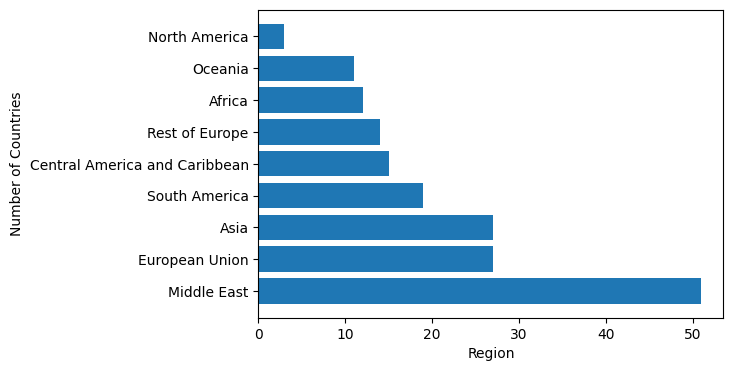

In [16]:
regions = life_expectancy_df['Region'].unique()
region_counts = (life_expectancy_df['Region'].value_counts() / country_occurences_df['occurences'].unique().astype('int32')).astype('int32')

plt.figure(figsize=(6,4))
ax = plt.subplot()

plt.barh(regions, region_counts)
plt.xlabel("Region")
plt.ylabel("Number of Countries")

plt.show()

In [17]:
class CountryComparator:
    
    def __init__(self, dataframe):
        
        """
        Initializes the CountryComparator with a DataFrame.

        Parameters:
        -----------
        dataframe : pd.DataFrame
            A DataFrame that must contain at least 'Country', 'Year', and numeric columns
            to be compared across countries.
        """
        self.life_expectancy_df = dataframe
        
    def show_available_colums(self):
        """
        Prints the available column names in the dataset for reference.
        """
        print("Available columns:")
        for col in self.life_expectancy_df.columns: 
            print(f'- {col}')
    
    @staticmethod
    def validate_columns(df, required_columns):
        """
        Checks if all required columns are present in the DataFrame.
        """
        missing = [col for col in required_columns if col not in df.columns]
        if missing:
            return f"Missing columns: {', '.join(missing)}"
        return "All required columns are present."
    
    def plot_life_expectancy_by_country(self, countryName):

        list_countries = life_expectancy_df['Country'].unique() # Get all valid countries
        
        if isinstance(countryName, str) and countryName in list_countries:
            life_expectancy_by_country = (
                life_expectancy_df[life_expectancy_df['Country'] == countryName]
                [['Region', 'Year', 'Life_expectancy']]
                .sort_values(by='Year'))
            
            plt.plot(life_expectancy_by_country['Year'], life_expectancy_by_country['Life_expectancy'], color='g')
            plt.title(f'Life expectancy of {countryName} over time')
            plt.xlabel('Year')
            plt.ylabel('Life expectancy by year')
            plt.show()
        else:
            print('Please enter a valid country')
        
        
    def compare_life_expectancy_between_countries(self, *countryNames):
        list_countries = life_expectancy_df['Country'].unique()

        # If no country names are passed
        if not countryNames:
            print("Please provide at least one country name.")
            return

        plt.figure(figsize=(10, 6))

        for country in countryNames:
            if isinstance(country, str) and country in list_countries:
                df_country = (
                    life_expectancy_df[life_expectancy_df['Country'] == country]
                    [['Year', 'Life_expectancy']]
                    .sort_values(by='Year')
                )
                plt.plot(df_country['Year'], df_country['Life_expectancy'], label=country)
            else:
                print(f"'{country}' is not a valid country name and will be skipped.")

        plt.title("Life Expectancy Comparison")
        plt.xlabel("Year")
        plt.ylabel("Life Expectancy")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    
    def compare_countries(self, *countryNames, columns=None):
        """
        Plots time series comparisons of one or more variables for specified countries.

        Parameters:
        -----------
        *countryNames : str
            Variable-length list of country names to include in the comparison.
            Must match the country names in the 'Country' column of `life_expectancy_df`.

        columns : str or list of str
            One or more column names from `life_expectancy_df` to plot.
            Each column will be plotted in a separate figure with country-level comparisons.

        Functionality:
        --------------
        - For each specified variable in `columns`, a separate line chart is generated.
        - Each chart compares the variable over time (`Year`) for the given countries.
        - Invalid country or column names are skipped with a warning message.

        Notes:
        ------
        - Assumes `life_expectancy_df` is a DataFrame available in the global scope,
        containing at least the columns: 'Country', 'Year', and the variables listed in `columns`.
        - Uses matplotlib to display plots.
        """
        
        list_countries = life_expectancy_df['Country'].unique()
        valid_columns = life_expectancy_df.columns

        if not countryNames:
            print("Please provide at least one country name.")
            return
        if columns is None:
            print("Please provide at least one column name to compare the countries against.")
            return

        # If a single column is passed as string, convert it to list
        if isinstance(columns, str):
            columns = [columns]

        for col in columns:
            if col not in valid_columns:
                print(f"'{col}' is not a valid column name and will be skipped.")
                continue

            plt.figure(figsize=(10, 6))  # Create a new figure for each column

            for country in countryNames:
                if isinstance(country, str) and country in list_countries:
                    df_country = (
                        life_expectancy_df[life_expectancy_df['Country'] == country]
                        .sort_values(by='Year')
                    )
                    plt.plot(df_country['Year'], df_country[col], label=country)
                else:
                    print(f"'{country}' is not a valid country name and will be skipped.")

            plt.title(f"{col} Comparison")
            plt.xlabel("Year")
            plt.ylabel(col)
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()

In [18]:
countryComparator = CountryComparator(life_expectancy_df) # Instantiate the class

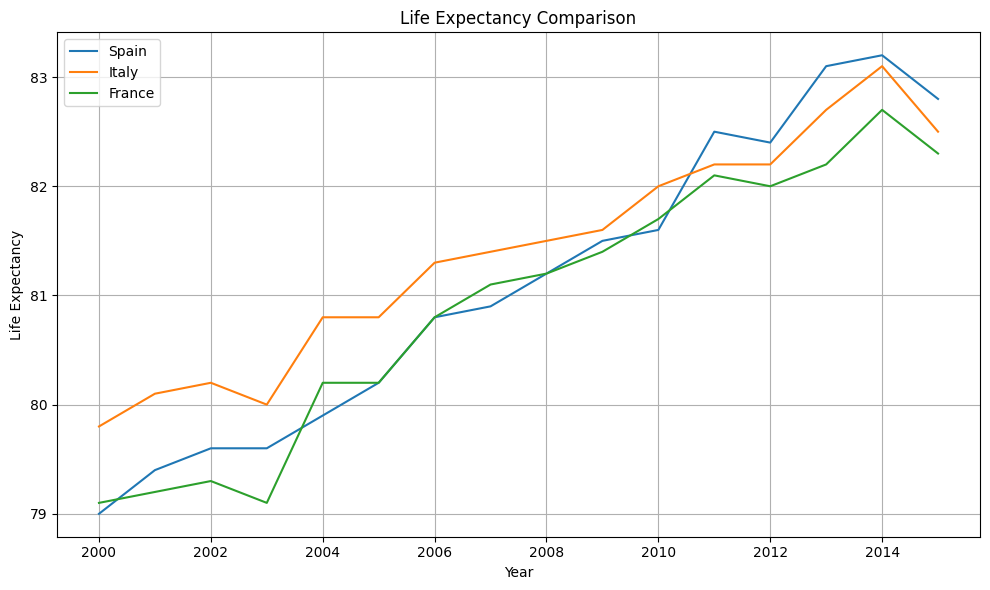

In [19]:
# Method to compare the life expectancy between several countries
countryComparator.compare_life_expectancy_between_countries('Spain', 'Italy', 'France') 

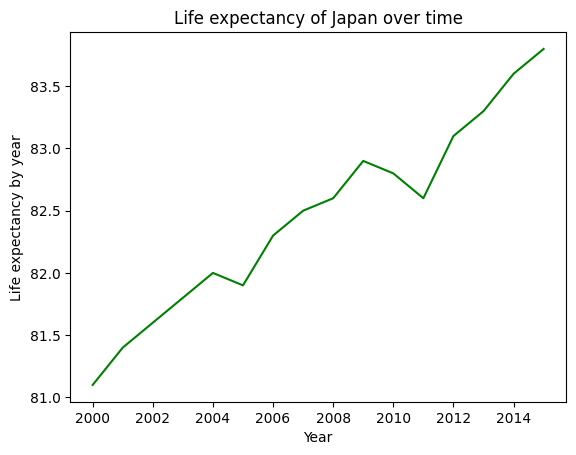

In [20]:
# Plot the life expectancy of 1 country
countryComparator.plot_life_expectancy_by_country('Japan')

In [21]:
countryComparator.show_available_colums()

Available columns:
- Country
- Region
- Year
- Infant_deaths
- Under_five_deaths
- Adult_mortality
- Alcohol_consumption
- Hepatitis_B
- Measles
- BMI
- Polio
- Diphtheria
- Incidents_HIV
- GDP_per_capita
- Population_mln
- Thinness_ten_nineteen_years
- Thinness_five_nine_years
- Schooling
- Life_expectancy
- Population_category
- Schooling_category
- Life_expectancy_category
- Economy_status


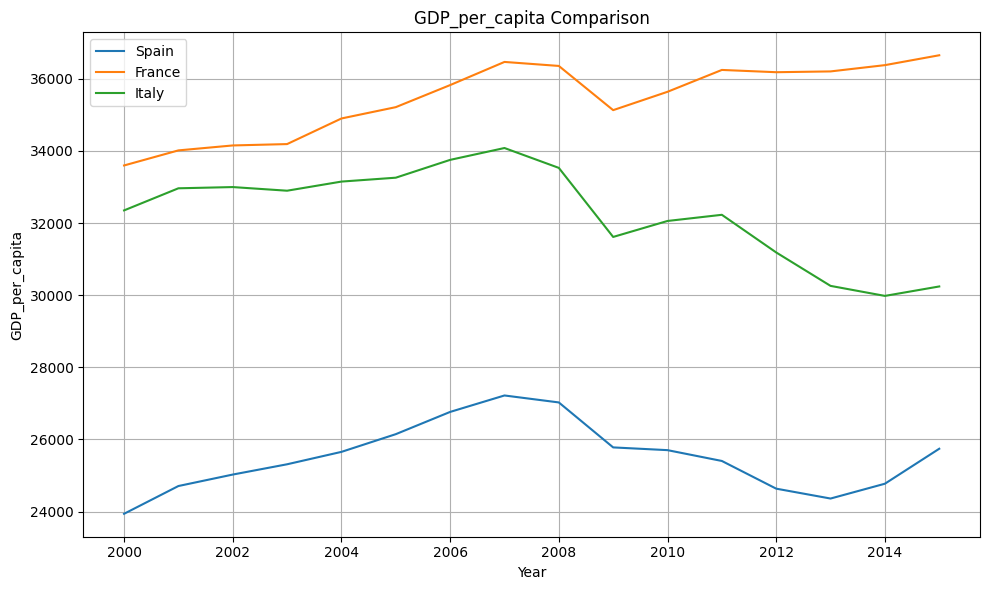

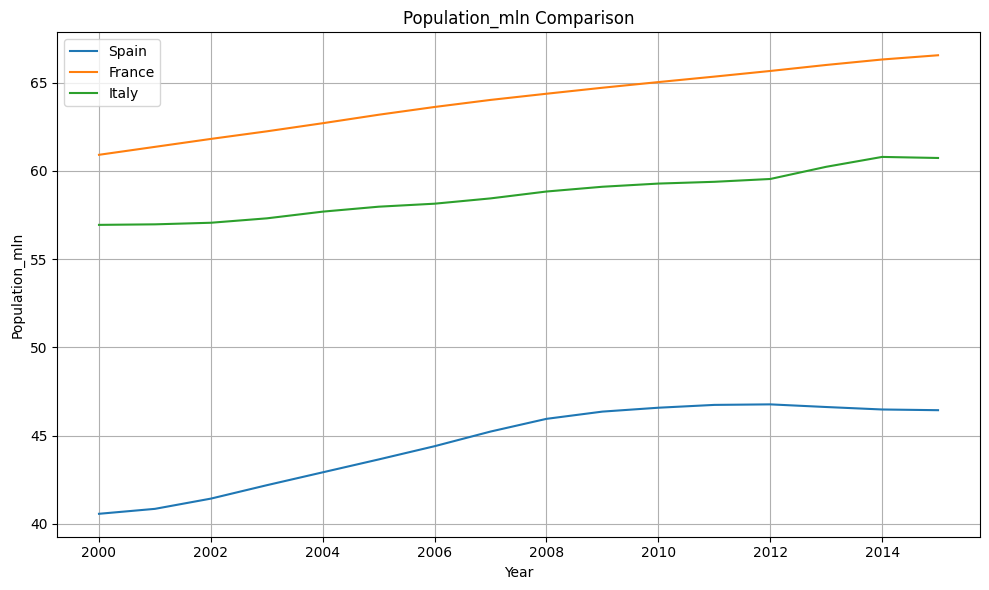

In [22]:
countryComparator.compare_countries('Spain', 'France', 'Italy', columns=['GDP_per_capita', 'Population_mln'])

In [23]:
msg_cols = CountryComparator.validate_columns(life_expectancy_df, ['Schooling', 'GDP_per_capita', 'Test_column'])
msg_cols

'Missing columns: Test_column'

# Statistical Analysis - Association of Variables 

### Utils

In [58]:
def box_plotter(data, x, y, hue=None, title="", xlabel="", ylabel="", horizontal=False, figsize=(6, 4)):
    """
    Function to plot box plots using seaborn.

    Parameters:
    - data: DataFrame
    - x: column name for x-axis (categorical variable)
    - y: column name for y-axis (numeric variable)
    - hue: optional, column name for hue separation
    - title: title of the plot
    - xlabel: label for x-axis
    - ylabel: label for y-axis
    - horizontal: if True, plot horizontally
    """
    plt.figure(figsize=figsize)
    sns.set(style="whitegrid")

    if horizontal:
        sns.boxplot(x=y, y=x, data=data, palette='Set2', linewidth=2, width=0.5, hue=x, legend=False)
        plt.xlabel(ylabel if ylabel else y, fontsize=12)
        plt.ylabel(xlabel if xlabel else x, fontsize=12)
    else:
        sns.boxplot(x=x, y=y, data=data, palette='Set2', linewidth=2, width=0.5, hue=x, legend=False)
        plt.xlabel(xlabel if xlabel else x, fontsize=12)
        plt.ylabel(ylabel if ylabel else y, fontsize=12)

    plt.title(title, fontsize=16)
    plt.xticks(rotation=45)  # Helpful even for horizontal plots sometimes
    plt.tight_layout()
    plt.show()


## Two Sample T-Test

### Two Sample T-Test: Economy Status vs. Life Expectancy

We want to determine whether there is a statistically significant difference in **life expectancy** between **developed** and **developing** economies.

#### Hypotheses:

- **Null Hypothesis (H₀):**  
  There is **no difference** in the average life expectancy between developed and developing countries.  
  *(μ₁ = μ₂)*

- **Alternative Hypothesis (H₁):**  
  There **is a difference** in the average life expectancy between developed and developing countries.  
  *(μ₁ ≠ μ₂)*

Where:
- μ₁ = mean life expectancy for developed countries
- μ₂ = mean life expectancy for developing countries

#### Test:
- Perform a **Two-Sample Independent T-Test** (assuming unequal variances).
- Significance level (α): **0.05**

---

In [34]:
from scipy.stats import ttest_ind # Import the t-test function

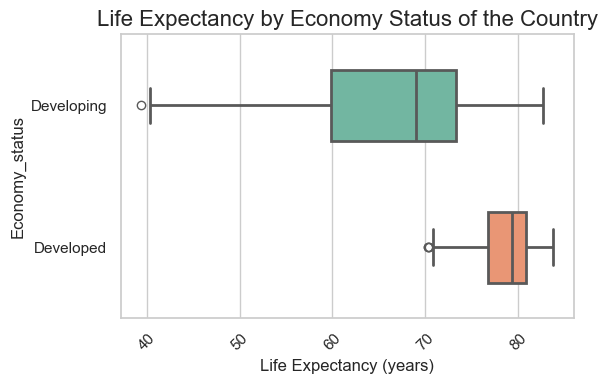

In [40]:

box_plotter(
    data=life_expectancy_df,
    x="Economy_status",
    y="Life_expectancy",
    hue="Economy_status",
    title="Life Expectancy by Economy Status of the Country",
    ylabel="Life Expectancy (years)",
    horizontal=True,
    figsize=(6, 4)
)


In [43]:
# Split the dataset into two groups based on economy status
life_expectancy_developed = life_expectancy_df[life_expectancy_df['Economy_status'] == 'Developed']['Life_expectancy']
life_expectancy_developing = life_expectancy_df[life_expectancy_df['Economy_status'] == 'Developing']['Life_expectancy']

# Perform the t-test
t_stat, p_val = ttest_ind(life_expectancy_developed, life_expectancy_developing)
print(f"T-statistic: {t_stat}\nP-value: {p_val}")

T-statistic: 32.89510831384994
P-value: 1.408139744698455e-201


#### T-Test Results: Life Expectancy Comparison Between Developed and Developing Economies

We performed an independent two-sample t-test to compare life expectancy between two groups: **developed** economies and **developing** economies. The null hypothesis for this test assumes that there is **no difference** in life expectancy between the two groups.

#### Results:
- **T-statistic**: 32.90
- **P-value**: 1.41 × 10⁻²⁰¹

#### Interpretation:

1. **T-statistic: 32.90**
   - The **T-statistic** measures the difference between the means of the two groups relative to the variation in the data. A high T-statistic indicates a large difference between the two groups.
   - In this case, the T-statistic of **32.90** is **very high**, suggesting a substantial difference in life expectancy between developed and developing economies.

2. **P-value: 1.41 × 10⁻²⁰¹**
   - The **P-value** indicates the probability of obtaining a result as extreme as the one observed, assuming the null hypothesis is true (i.e., that there is no difference in life expectancy between the two groups).
   - A **very small P-value** (in this case, **1.41 × 10⁻²⁰¹**) indicates that the observed difference is **highly statistically significant**. In simpler terms, it means that it is extremely unlikely that this difference is due to random chance.

#### Conclusion:
- Since the **P-value** is much smaller than the commonly used significance level of 0.05, we can **reject the null hypothesis**. This means that there is **strong evidence** to suggest that life expectancy differs significantly between developed and developing economies.
- Specifically, we can conclude that life expectancy in **developed economies** is **significantly higher** than in **developing economies**.

These findings highlight a substantial disparity in life expectancy between the two groups, which could be attributed to factors such as healthcare, infrastructure, and economic conditions in each group.

## ANOVA & Tukey's Range Test

### ANOVA and Tukey's Range Test: Analyzing Life Expectancy by Region

In this analysis, we will explore the association between **life expectancy** and **Region** using **ANOVA** (Analysis of Variance) and **Tukey's Range Test**. The goal is to assess whether there are significant differences in life expectancy between the regions and to perform post-hoc analysis to identify which regions differ from each other.

#### One-Way ANOVA

**ANOVA** is used to compare the means of life expectancy across multiple groups (regions, in this case). The null hypothesis for ANOVA states that all the group means (life expectancy by region) are equal.

##### Hypotheses:
- **Null hypothesis**: The means of life expectancy are the same across all regions.
- **Alternative hypothesis**: At least one region has a different mean life expectancy.


In [47]:
from scipy.stats import f_oneway # Import the ANOVA function
from statsmodels.stats.multicomp import pairwise_tukeyhsd # Import Tukey's Range Test

In [48]:
# Identify the groups for ANOVA based on the Regions in the dataset
regions = life_expectancy_df['Region'].unique()
regions

array(['Middle East', 'European Union', 'Asia', 'South America',
       'Central America and Caribbean', 'Rest of Europe', 'Africa',
       'Oceania', 'North America'], dtype=object)

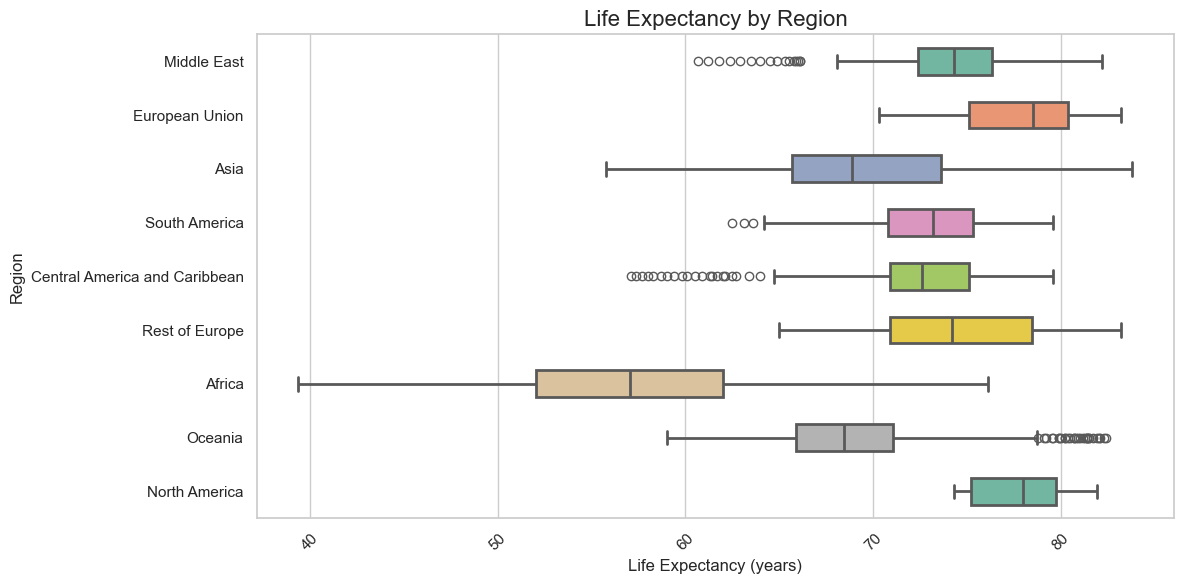

In [60]:
box_plotter(
    data=life_expectancy_df,
    x="Region",
    y="Life_expectancy",
    title="Life Expectancy by Region",
    ylabel="Life Expectancy (years)",
    horizontal=True,
    figsize=(12, 6)
)

In [61]:
#Split the dataset into groups based on region
middle_east = life_expectancy_df[life_expectancy_df['Region'] == 'Middle East']['Life_expectancy']
european_union = life_expectancy_df[life_expectancy_df['Region'] == 'European Union']['Life_expectancy']
asia = life_expectancy_df[life_expectancy_df['Region'] == 'Asia']['Life_expectancy']
south_america = life_expectancy_df[life_expectancy_df['Region'] == 'South America']['Life_expectancy']
central_america_caribbean = life_expectancy_df[life_expectancy_df['Region'] == 'Central America and Caribbean']['Life_expectancy']
rest_europe = life_expectancy_df[life_expectancy_df['Region'] == 'Rest of Europe']['Life_expectancy']
africa = life_expectancy_df[life_expectancy_df['Region'] == 'Africa']['Life_expectancy']
oceania = life_expectancy_df[life_expectancy_df['Region'] == 'Oceania']['Life_expectancy']
north_america = life_expectancy_df[life_expectancy_df['Region'] == 'North America']['Life_expectancy']

In [63]:
anova_result = f_oneway(
    middle_east,
    european_union,
    asia,
    south_america,
    central_america_caribbean,
    rest_europe,
    africa,
    oceania,
    north_america
)

# Print ANOVA results
print(f"F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")

F-statistic: 585.3498593161609
P-value: 0.0


#### ANOVA Results: Life Expectancy by Region

We performed an **ANOVA** (Analysis of Variance) to examine whether there are significant differences in **life expectancy** across different regions. The null hypothesis for ANOVA assumes that there is **no difference** in life expectancy between the regions.

#### ANOVA Results:
- **F-statistic**: 585.35
- **P-value**: 0.0

#### Interpretation:

1. **F-statistic: 585.35**
   - The **F-statistic** measures how much the means of the groups (regions) differ relative to the variation within each group. A large F-statistic suggests that the variation between the groups (regions) is much greater than the variation within each group.
   - In this case, the **F-statistic of 585.35** is very large, indicating a **significant difference** in life expectancy across the regions.

2. **P-value: 0.0**
   - The **P-value** tells us the probability of observing a difference as large as the one found if the null hypothesis (that all groups have the same mean) were true. A **P-value of 0.0** means the probability is effectively zero, which is **far below the typical significance level of 0.05**.
   - This indicates **strong evidence** against the null hypothesis, so we **reject the null hypothesis**.

#### Conclusion:
- Since the **P-value is 0.0**, we reject the null hypothesis and conclude that there are **significant differences** in life expectancy between the regions.
- The **F-statistic of 585.35** further reinforces this conclusion, showing that the difference between regions is **substantial**.
- As a next step, we could perform a **post-hoc test** (such as **Tukey's Range Test**) to identify which specific regions differ from each other in terms of life expectancy.

This analysis confirms that **life expectancy varies significantly** across the regions studied.

### Tukey's Range Test: Post-hoc Analysis for Life Expectancy by Region

Since the **ANOVA** results showed a significant difference in life expectancy across the regions, we will now perform **Tukey's Range Test** to determine which specific regions have significantly different life expectancy values. Tukey's test is a **pairwise comparison test** that adjusts for multiple comparisons, helping to identify exactly where the differences lie.


In [67]:
# To identify which groups are significantly different we will complement the anova analysis with Tukey's Range Test
tukey_result = pairwise_tukeyhsd(endog=life_expectancy_df['Life_expectancy'], 
                                 groups=life_expectancy_df['Region'], 
                                 alpha=0.05)
tukey_result.summary() # Print the summary of Tukey's test

group1,group2,meandiff,p-adj,lower,upper,reject
Africa,Asia,11.6076,0.0,10.5369,12.6782,True
Africa,Central America and Caribbean,14.5902,0.0,13.3812,15.7992,True
Africa,European Union,19.8677,0.0,18.7971,20.9384,True
Africa,Middle East,16.1281,0.0,14.7709,17.4854,True
Africa,North America,19.9944,0.0,17.3219,22.6668,True
Africa,Oceania,11.6703,0.0,10.1749,13.1658,True
Africa,Rest of Europe,16.6781,0.0,15.3568,17.9994,True
Africa,South America,14.9334,0.0,13.4901,16.3767,True
Asia,Central America and Caribbean,2.9826,0.0,1.6356,4.3297,True
Asia,European Union,8.2602,0.0,7.0359,9.4845,True


#### Tukey's Range Test Results: Post-hoc Analysis for Life Expectancy by Region

After performing **ANOVA**, we conducted **Tukey's Range Test** to identify which specific regions have significant differences in life expectancy. The test compares all possible pairs of regions and provides **mean differences**, **p-values**, and **confidence intervals** to help determine which regions differ from each other.

#### Tukey's Test Results Overview:

The table below presents the results of Tukey's Range Test for pairwise comparisons of life expectancy between regions. The columns show:
- **group1** and **group2**: The regions being compared.
- **meandiff**: The difference in life expectancy between the two regions.
- **p-adj**: The adjusted p-value for the comparison, accounting for multiple tests.
- **lower** and **upper**: The lower and upper bounds of the 95% confidence interval for the difference in means.
- **reject**: Whether or not the null hypothesis (no difference between groups) is rejected. If `True`, the difference between the regions is statistically significant.

#### Key Findings:

1. **Africa vs. Other Regions**:
   - **Africa** has significantly **lower life expectancy** compared to all other regions, such as **Asia**, **Central America and Caribbean**, **European Union**, **Middle East**, **North America**, **Oceania**, **Rest of Europe**, and **South America**. All pairwise comparisons with **Africa** have **p-values** of 0.0, indicating highly significant differences.

2. **Asia vs. Other Regions**:
   - **Asia** shows significant differences in life expectancy compared to regions such as **Africa**, **Central America and Caribbean**, **European Union**, **Middle East**, **North America**, **Rest of Europe**, and **South America**. However, there is no significant difference between **Asia** and **Oceania** (p-adj = 1.0), indicating that life expectancy in **Asia** and **Oceania** is statistically similar.

3. **Central America and Caribbean**:
   - **Central America and Caribbean** has significant differences compared to **European Union**, **North America**, **Oceania**, and **Rest of Europe**, but no significant difference compared to **South America** and **Middle East**. For example, the p-value between **Central America and Caribbean** and **South America** is **0.9994**, indicating no significant difference.

4. **European Union**:
   - **European Union** shows significant differences in life expectancy compared to regions like **Africa**, **Asia**, **Middle East**, **Oceania**, and **South America**. There are **no significant differences** between **European Union** and **North America** (p-adj = 1.0).

5. **Oceania and South America**:
   - **Oceania** and **South America** show significant differences when compared to other regions. For instance, **Oceania** has significantly lower life expectancy compared to **North America**, and **South America** has significant differences when compared to regions like **Africa** and **North America**.

#### Example of Significant Comparisons:

- **Africa vs. Asia**: 
   - **meandiff**: -11.6076 years
   - **p-adj**: 0.0 (significant difference)
   - **Conclusion**: Life expectancy in **Africa** is significantly lower than in **Asia**.

- **Africa vs. European Union**: 
   - **meandiff**: -19.8677 years
   - **p-adj**: 0.0 (significant difference)
   - **Conclusion**: Life expectancy in **Africa** is significantly lower than in the **European Union**.

- **Asia vs. Oceania**:
   - **meandiff**: 0.0628 years
   - **p-adj**: 1.0 (not significant)
   - **Conclusion**: No significant difference in life expectancy between **Asia** and **Oceania**.

- **North America vs. South America**:
   - **meandiff**: -5.0609 years
   - **p-adj**: 0.0 (significant difference)
   - **Conclusion**: Life expectancy in **North America** is significantly lower than in **South America**.

#### Conclusion:

- The **Tukey's Range Test** results confirm that **Africa** has significantly lower life expectancy compared to all other regions. This is indicated by the **p-values** of 0.0 in all comparisons involving **Africa**.
- **Asia** and **Oceania** show no significant difference, suggesting that their life expectancy rates are similar.
- **Tukey's Range Test** allows us to identify which regions have significantly different life expectancy and provides a clearer understanding of how life expectancy varies across different regions.

## Chi-Square Test of Independence

### Chi-Square Test of Independence: Life Expectancy Category vs Population Category

To examine whether there is a statistically significant relationship between the **life expectancy category** and **population category**, we perform a **Chi-Square Test of Independence**. This test helps determine whether the two categorical variables are independent or if they are associated with each other.

#### Steps for Performing the Chi-Square Test:

1. **Create a Contingency Table**: We first create a contingency table showing the frequency of observations for each combination of categories from the two variables.
   
2. **Perform the Chi-Square Test**: The **Chi-Square Test of Independence** is then applied to the contingency table to assess whether the distribution of values across the categories of one variable is independent of the other variable.


In [71]:
from scipy.stats import chi2_contingency

In [75]:
contingency_table = pd.crosstab(
    life_expectancy_df['Life_expectancy_category'],
    life_expectancy_df['Population_category']
)

print(contingency_table)

Population_category       High   Low  Medium
Life_expectancy_category                    
High Life Expectancy        35   673      84
Low Life Expectancy         16   530      25
Medium Life Expectancy     111  1281     109


In [74]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies Table:\n{expected}")

Chi-Square Statistic: 38.858437392346154
P-value: 7.451595815753248e-08
Degrees of Freedom: 4
Expected Frequencies Table:
[[  44.79888268  686.91620112   60.2849162 ]
 [  32.29818436  495.23882682   43.46298883]
 [  84.90293296 1301.84497207  114.25209497]]


### Chi-Square Test of Independence: Life Expectancy Category vs Population Category

We conducted a **Chi-Square Test of Independence** to explore whether there is an association between **life expectancy category** and **population category**. This test examines whether the distribution of one variable (life expectancy category) depends on the distribution of the other variable (population category).

#### Contingency Table:

The table below shows the observed frequencies of life expectancy categories and population categories:

| Life Expectancy Category | High | Low  | Medium |
|--------------------------|------|------|--------|
| High Life Expectancy      | 35   | 673  | 84     |
| Low Life Expectancy       | 16   | 530  | 25     |
| Medium Life Expectancy    | 111  | 1281 | 109    |

#### Chi-Square Test Results:

- **Chi-Square Statistic**: 38.86
- **P-value**: 7.45e-08
- **Degrees of Freedom**: 4
- **Expected Frequencies Table**:

| Life Expectancy Category | High         | Low           | Medium        |
|--------------------------|--------------|---------------|---------------|
| High Life Expectancy      | 44.80        | 686.92        | 60.28         |
| Low Life Expectancy       | 32.30        | 495.24        | 43.46         |
| Medium Life Expectancy    | 84.90        | 1301.84       | 114.25        |

#### Interpretation:

- **Chi-Square Statistic (38.86)**: This value indicates the difference between the observed frequencies and the expected frequencies across all categories.
  
- **P-value (7.45e-08)**: The extremely low p-value (much smaller than the typical significance level of 0.05) indicates that we can **reject the null hypothesis**. This means that there is a **statistically significant association** between the **life expectancy category** and **population category**.

- **Degrees of Freedom (4)**: The degrees of freedom are calculated based on the number of rows and columns in the contingency table. In this case, we have 3 life expectancy categories and 3 population categories, so the degrees of freedom are (3-1) * (3-1) = 4.

- **Expected Frequencies**: The expected frequencies are the counts we would expect to observe in each category if there were no relationship between the variables. Comparing the observed and expected frequencies shows that there is a significant deviation, further supporting the conclusion that life expectancy category and population category are not independent.

#### Conclusion:

Since the **p-value is much less than 0.05**, we reject the null hypothesis. Therefore, we conclude that there is a **significant association** between **life expectancy category** and **population category**. This means that the life expectancy of a country is likely to depend on its population category (High, Low, Medium), and they are not independent of each other.
